## Imports

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Loading The Dataset

In [312]:
train_set = pd.read_csv('segmentation.Train.csv').to_numpy()
test_set = pd.read_csv('segmentation.test.csv').to_numpy()

x_train = train_set[:, 1:].astype('float32')
x_test = test_set[:, 1:].astype('float32')
y_train = train_set[:, 0]
y_test = test_set[:, 0]

## KNN Algorithm

In [313]:
def knn(x_train, y_train, x_test, k, dist):
    
    predictions = []
    
    for x_ts in x_test:
        
        if dist == 'euclidean':
            distances = np.linalg.norm(x_ts - x_train, axis=1)
        elif dist == 'cosine':
            distances = np.dot(x_train, x_ts) / (np.linalg.norm(x_ts) * np.linalg.norm(x_train, axis=1))
            
        indices = np.argpartition(distances, k)[:k]
        labels = y_train[indices]
        prediction = Counter(labels).most_common(1)[0][0]
        predictions.append(prediction)
    
    return np.array(predictions)

## Prediction Time!

In [314]:
ks = range(1, 9)

euclidean_accuracy = []
cosine_accuracy = []

accuracy = lambda preds, labels: sum([1 for e in np.equal(preds, labels) if e == True]) / len(preds)

for k in ks:
    
    euc_pred = knn(x_train, y_train, x_test, k=k, dist='euclidean')
    cos_pred = knn(x_train, y_train, x_test, k=k, dist='cosine')
    
    euclidean_accuracy.append(accuracy(euc_pred, y_test))
    cosine_accuracy.append(accuracy(cos_pred, y_test))

## Comparing Different Ks and Similarity Measures

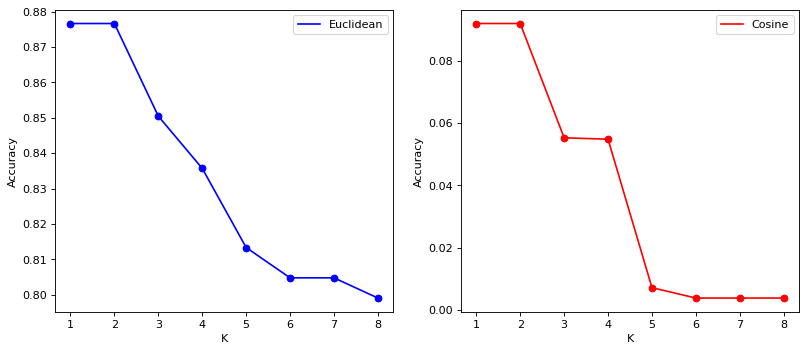

In [320]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['figure.dpi'] = 80
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(ks, euclidean_accuracy, label='Euclidean', color='b')
ax1.scatter(ks, euclidean_accuracy, color='b')
ax2.plot(ks, cosine_accuracy, label='Cosine', color='r')
ax2.scatter(ks, cosine_accuracy, color='r')

ax1.set_xlabel('K')
ax2.set_xlabel('K')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Accuracy')
ax1.legend()
ax2.legend()
plt.show()